# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# Import numpy and pandas
import pandas as pd

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
# Run this code:

sensor = pd.read_csv('../data/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [8]:
# Your code here:

sensor.isna().sum().sum()

np.int64(0)

How many rows and columns are in our data?

In [9]:
# Your code here:

sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [10]:
# Your code here:

time_index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=len(sensor))

Assign the time series index to the dataframe's index.

In [11]:
# Your code here:
sensor.index = time_index

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

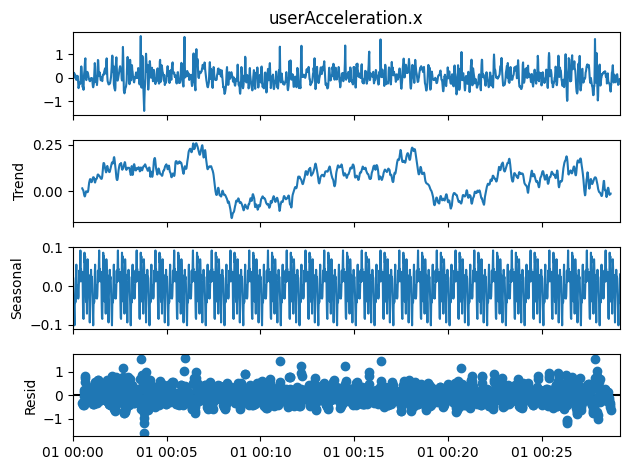

In [12]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model='additive', period=60)
decomposition.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

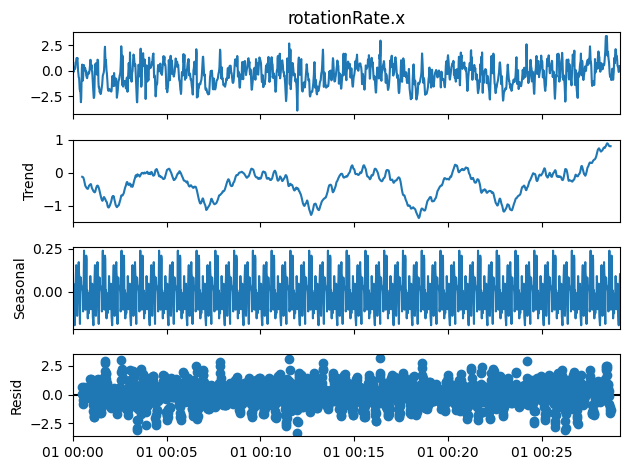

In [13]:
decomposition_rot = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model='additive', period=60)
decomposition_rot.plot()
plt.show()

## Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

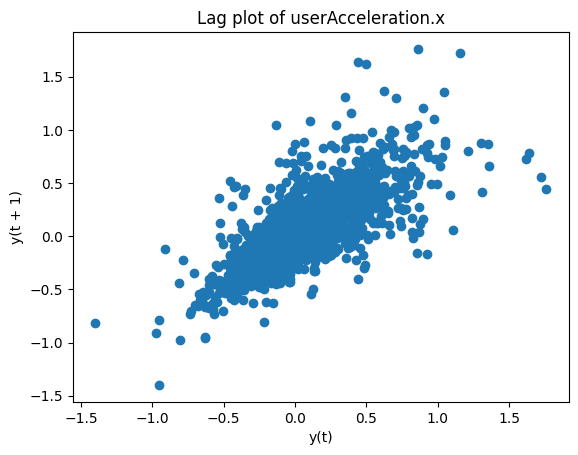

In [14]:
from pandas.plotting import lag_plot

# Your code here:

import matplotlib.pyplot as plt

lag_plot(sensor['userAcceleration.x'])
plt.title('Lag plot of userAcceleration.x')
plt.show()

Create a lag plot for `rotationRate.x`

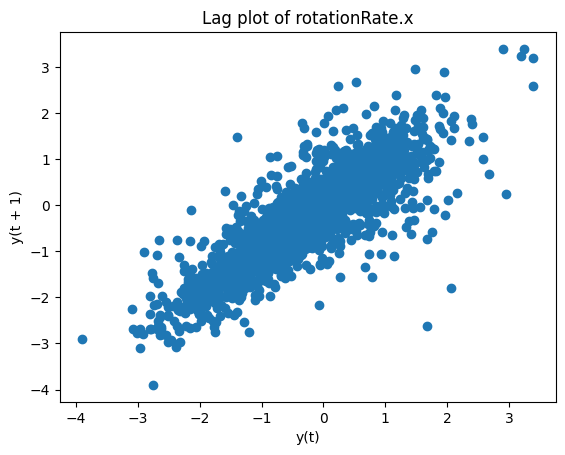

In [16]:
# Your code here:

lag_plot(sensor['rotationRate.x'])
plt.title('Lag plot of rotationRate.x')
plt.show()

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
from statsmodels.tsa.stattools import adfuller

# Your code here:
# Augmented Dickey-Fuller test for userAcceleration.x
adf_result_acc = adfuller(sensor['userAcceleration.x'])
print('ADF Statistic for userAcceleration.x:', adf_result_acc[0])
print('p-value:', adf_result_acc[1])

# Augmented Dickey-Fuller test for rotationRate.x
adf_result_rot = adfuller(sensor['rotationRate.x'])
print('ADF Statistic for rotationRate.x:', adf_result_rot[0])
print('p-value:', adf_result_rot[1])


ADF Statistic for userAcceleration.x: -17.957994086169762
p-value: 2.823439483037483e-30
ADF Statistic for rotationRate.x: -5.269860625086409
p-value: 6.320230335912605e-06


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Your code here:
# Split the data
train = sensor['userAcceleration.x'][:-10]
test = sensor['userAcceleration.x'][-10:]

# Fit ARMA model (ARIMA with order (2,0,1))
model = ARIMA(train, order=(2, 0, 1))
model_fit = model.fit()

# Forecast the next 10 values
pred = model_fit.forecast(steps=10)
pred


c:\Programming\Ironhack\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
c:\Programming\Ironhack\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
c:\Programming\Ironhack\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)


2018-01-01 00:29:01    0.173146
2018-01-01 00:29:02    0.142889
2018-01-01 00:29:03    0.100513
2018-01-01 00:29:04    0.070097
2018-01-01 00:29:05    0.056091
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
Freq: s, Name: predicted_mean, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [20]:
from statsmodels.tools.eval_measures import rmse

# Your code here:

rmse_value = rmse(test, pred)
print("RMSE:", rmse_value)

RMSE: 0.22529160449986013
